**| Muhammad Dawood Khan  |**


*Kaggle Profile :* https://www.kaggle.com/learnerdawood 

*Github :* https://github.com/Dawood-ML

*LinkedIn :* https://www.linkedin.com/in/muhammad-dawood-khan-5a3292329/

# Predicting heart disease using machine learning

Steps: 
* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation
## Problem definition

In a statement
> Given clinical parameters about a patient to see whethear we can predict if they heart disease or not

## Data
The original dataset was taken from UCI and is also available in kaggle

## Evaluation

> If the model gives 95% accuracy while predicting the heart disease then the model has succeeded

## Features

Different information about the features

**Create data dictionory**

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |



In [1]:
# Import everything required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

## Load Data

In [2]:
df = pd.read_csv("D:/ml/zero-to-mastery-ml-master/data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

## Data Exploration 

*EDA* : 
1. Questions about the data
2. What type of data
3. Any missing values
4. Outliers ?
5. Can the features be tweeked (add, change, remove) for better quality data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [7]:
df.target.mean() # this is a balanced problem

0.5445544554455446

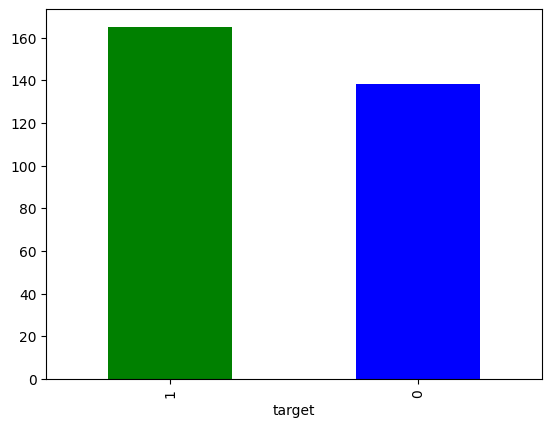

In [8]:
df['target'].value_counts().plot(kind='bar',color=['green', 'blue'])
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

or

Comparing target column to sex column. Wheather being a certain gender can increase chances for a heart attak

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# Compare
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


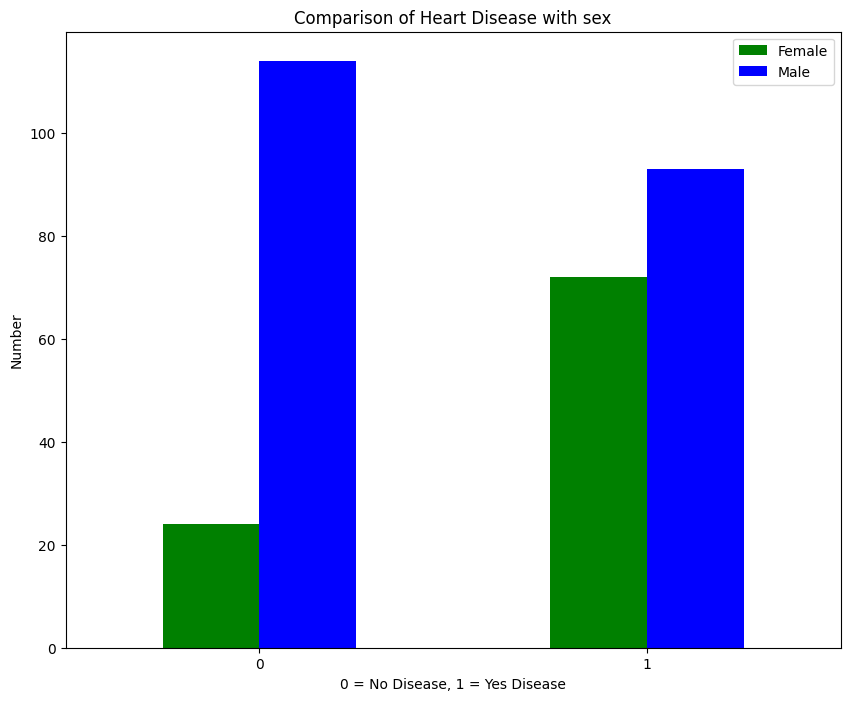

In [14]:
# Plot
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10, 8),
                                  color=('green', 'blue'))
plt.title("Comparison of Heart Disease with sex")
plt.xlabel('0 = No Disease, 1 = Yes Disease')
plt.ylabel('Number')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

## Age vs Max Heart Rate for heart disease

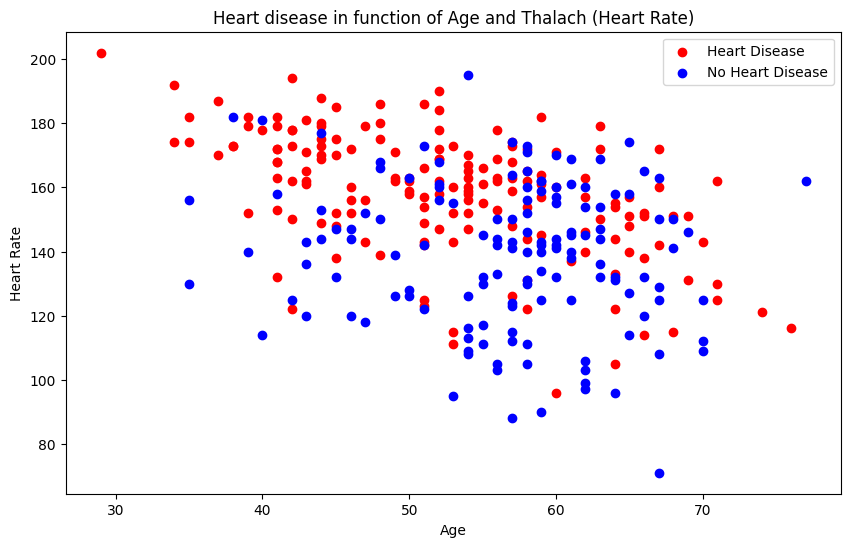

In [15]:
# Create another figure
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1], # This will only pick Yes Heart Disease from age and thalach
           c='red')
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],# No heart disease
           c='blue');

# Add communications
plt.title("Heart disease in function of Age and Thalach (Heart Rate)")
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Heart Disease', 'No Heart Disease'])
plt.show()

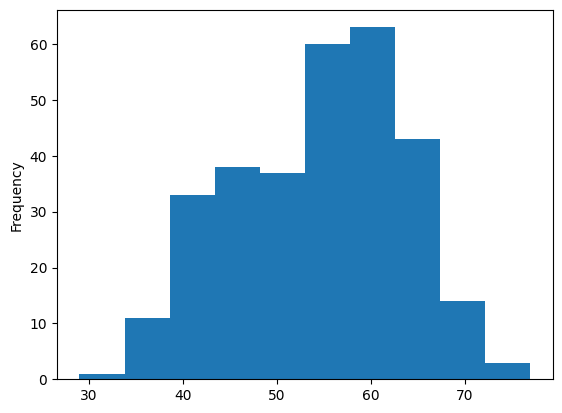

In [16]:
# What's the distribution of the age column with a histogram
df.age.plot.hist();

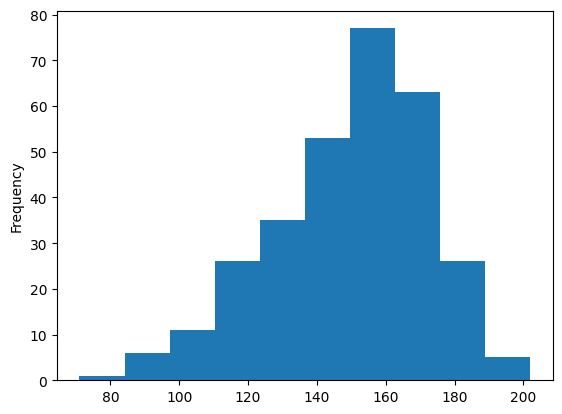

In [17]:
df.thalach.plot.hist();

## Heart Disease per Chest Pain Type ( cp )
 **cp**  

 **Chest pain type :**  
   * 0 : Typical angina (chest pain), 
   * 1 : Atypical angina (chest pain not related to heart), 
   * 2 : Non-anginal pain (typically esophageal spasms (non heart related), 
   * 3 : Asymptomatic (chest pain not showing signs of disease) 

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


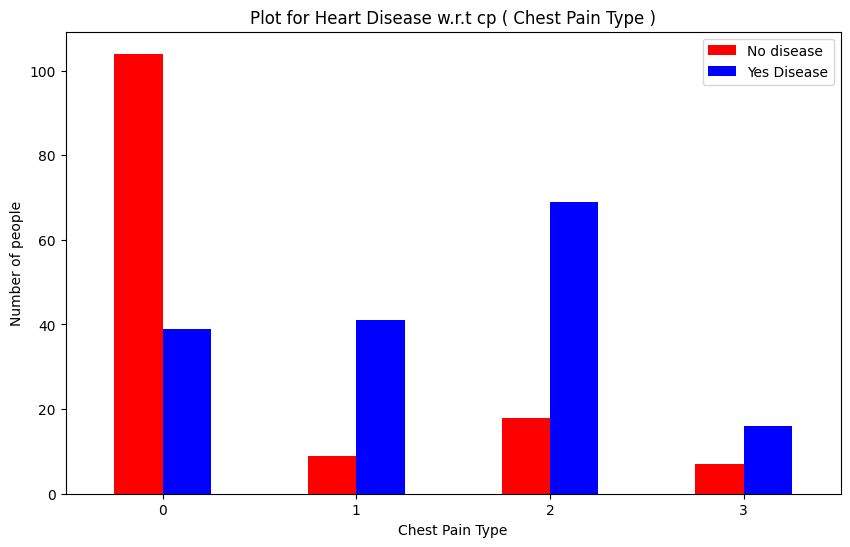

In [19]:
# crosstab plt
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color = ('red', 'blue'))
plt.title("Plot for Heart Disease w.r.t cp ( Chest Pain Type )")
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.legend(['No disease', 'Yes Disease'])
plt.show()

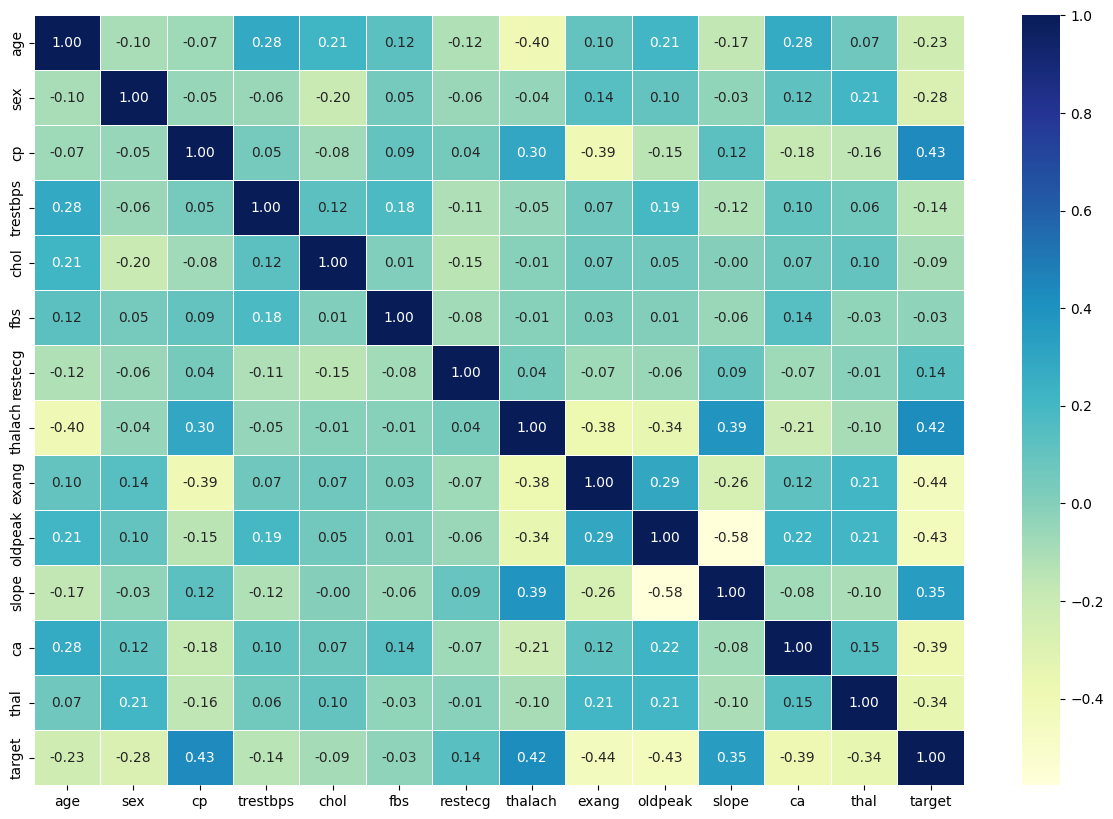

In [20]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

### 5. Modelling

In [21]:
df.head(
    
)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
 # splitting
X = df.drop('target', axis=1)
y = df['target']
np.random.seed(42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:
len(X_train), len(y_train)

(242, 242)

To better understand what model to use. We will consult the sklearn machine learning map

The models :
1. Logistic Regression
2. K-Nearest Neighbours
3. Random Forest Classifier

In [24]:
# Make a dictionary of models
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Function to fit the models and test them
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning moels.
    models : A dict of different Sklearn ML models
    X_train : Independent training data
    X_test : Independent testing data
    y_train : dependant training data
    y_test : dependent testing data
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
fit_score(models, X_train, X_test, y_train, y_test)

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


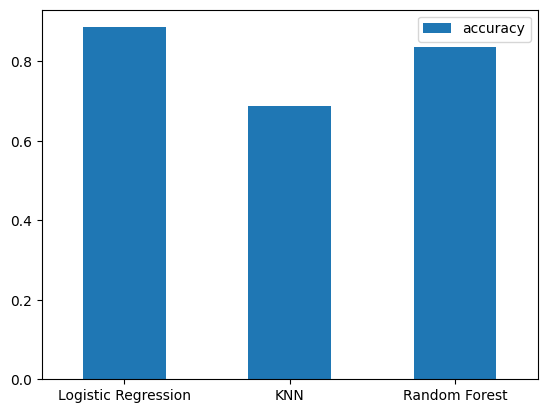

In [26]:
model_compare = pd.DataFrame(fit_score(models, X_train, X_test, y_train, y_test), index=['accuracy'])
model_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.show()



* Let's Tune it ( Hyperparameter Tuning )
* Feature Importance
* Confusion matrix
* cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


## Hyperparameter tuning ( By hand )

In [28]:
# KNN
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


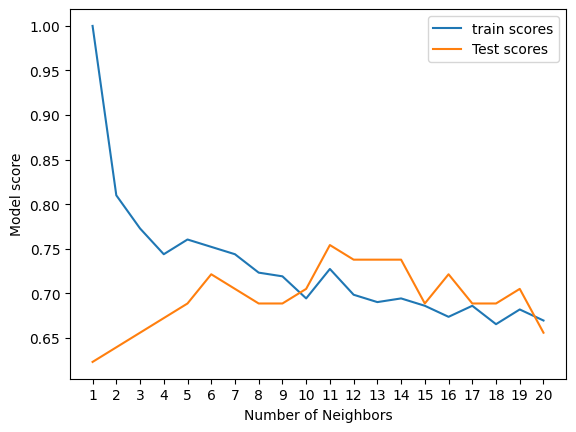

In [31]:
plt.plot(neighbors, train_scores, label = "train scores")
plt.plot(neighbors, test_scores, label = "Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model score')
plt.legend()


print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

## Randomized Search CV 
to Tune Logistic Regression and Random Forest Classifier


In [32]:
# Grid for logistic regression
log_reg_grid = {'C':np.logspace(-4, 4, 20),
                'solver':["liblinear"]}

# grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [34]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True,
                               n_jobs=1)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [37]:
np.random.seed(42)
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                     param_distributions=rf_grid,
                                     verbose=True,
                                     n_iter = 20,
                                     cv=5,
                                     n_jobs=1)

rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_random_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [39]:
rs_random_forest.score(X_test, y_test)

0.8688524590163934

1. Tuning Hyperparameters by hand
2. RandomizedSearchCV
3. GridSearchCV

In [40]:
# Logistic Regression GSCV
log_reg_grid_gs = {'C':np.logspace(-4, 4, 30),
                  "solver": ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid_gs,
                         verbose=True,
                         cv=5,
                         n_jobs=1)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [43]:
# Donot Run this code as it will take alot of time and will not produce great results


# rf_grid_gs = {'n_estimators':np.arange(5, 500, 30),
#               "max_depth": [None, 3,5],
#               "min_samples_split": np.arange(2, 20, 4),
#               "min_samples_leaf": np.arange(1, 20, 4)}

# gs_rf = GridSearchCV(RandomForestClassifier(),
#                     param_grid=rf_grid_gs,
#                     verbose=True,
#                     cv=5,
#                     n_jobs=1)
# gs_rf.fit(X_train, y_train)

In [44]:
# gs_rf.best_params_

In [45]:
# gs_rf.score(X_test, y_test)

## RandomForestClassifier SH*T on the code but it's all right at least we got 88% on our logistic regression

````

````
````
````
````
````

## Evaluating our Logistic Regression

* ROC curve adn AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score

In [46]:
gs_log_reg

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [47]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

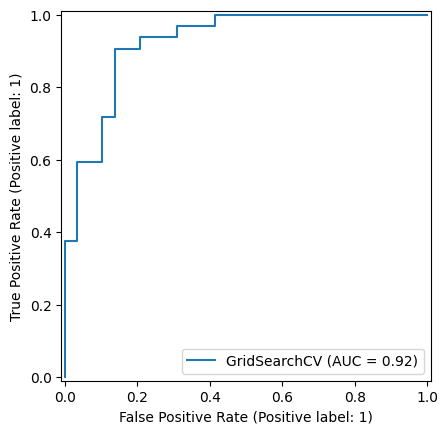

In [48]:
# ROC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

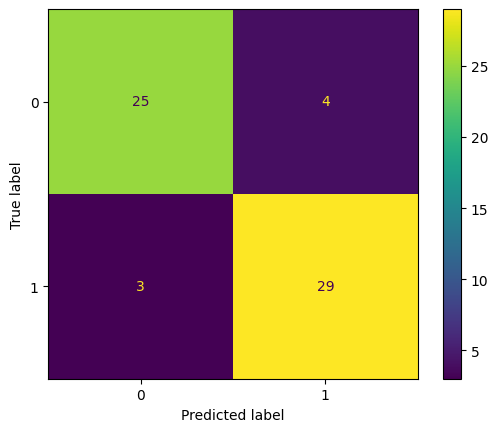

In [49]:
# Confusion matrix
Conf_Matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
Conf_Matrix.plot()
plt.show()

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



*Now the problem is that Classification is based on 1 set of train and test split. A better way to approach this is by using cross validation score*

In [51]:
gs_log_reg

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
precision = cross_val_score(gs_log_reg,
               X,
               y,
               verbose=True,
               cv=5,
               scoring='precision').mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [53]:
recall = cross_val_score(gs_log_reg,
               X,
               y, 
               verbose=True,
               cv=5,
               scoring='recall').mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [54]:
f1_score = cross_val_score(gs_log_reg,
               X,
               y,
               verbose=True,
               cv=5,
               scoring='f1').mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [55]:
accuracy = cross_val_score(gs_log_reg,
               X,
               y,
               cv=5,
               verbose=True,
               scoring='accuracy').mean()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [56]:
metric_dict = {
    'precision':precision,
    'recall':recall,
    'f1 Score':f1_score,
    'Accuracy':accuracy
}

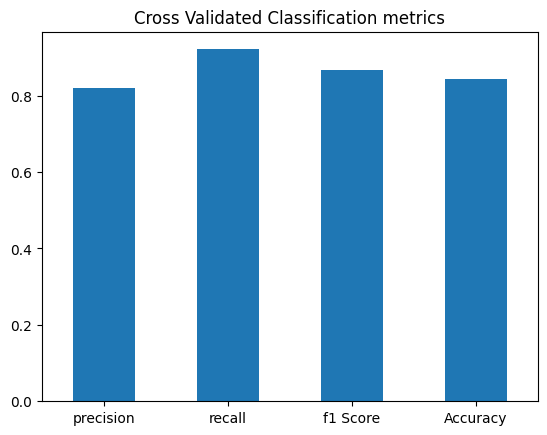

In [57]:
cv_metrics_df = pd.DataFrame(metric_dict,
                            index=[0])

cv_metrics_df.T.plot.bar(title="Cross Validated Classification metrics",
                        legend=False)
plt.xticks(rotation=0)
plt.show()

In [58]:
print(f" Precision : {precision*100:.2f}%\n Recall    :  {recall*100:.2f}%\n F1 Score  : {f1_score*100:.2f}%\n Accuracy  : {accuracy*100:.2f}%")

 Precision : 82.08%
 Recall    :  92.12%
 F1 Score  : 86.73%
 Accuracy  : 84.46%


### Feature Importance

Which feature contributed the most in the models outcome.
Finding feature importance is different for every machine learning model

In [59]:
clf= LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [60]:
# Check coefficient coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [66]:
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

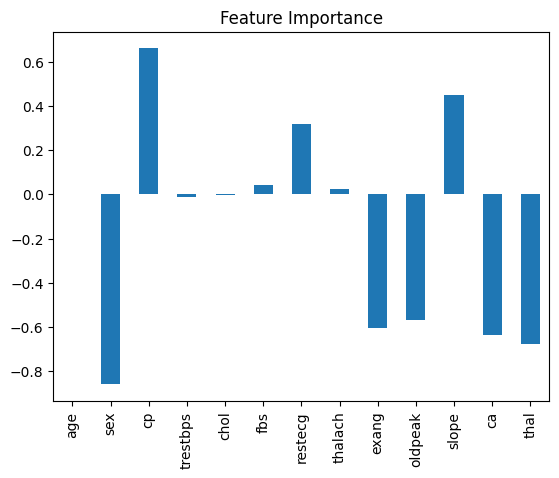

In [74]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()

In [75]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [76]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation
If we don't have our desired accuracy. then

* Can we collect more data ?
* Can we try a better model ?
* Can we improve the current models ?

* If the model predicted good then export and share it